## Day 23 Lecture 1 Assignment

In this assignment, we will explore feature selection and dimensionality reduction techniques. We will use both the FIFA ratings dataset and the Chicago traffic crashes dataset.

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [3]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


We will begin with the Chicago traffic crashes dataset, focusing on removing columns with significant missing data.

Remove all columns with more than 5% missing data from the dataframe. (The *missingness summary* function we wrote a few exercises ago will speed this process up significantly.) Print out the columns that were removed, and the proportion of missing data for each column.

In [14]:
df = crash_data.copy()

In [21]:
missing_mean = df.isnull().mean()

In [44]:
sorted_missing = missing_mean.sort_values(ascending=False, inplace=True)

In [27]:
toDrop = df.columns[df.isnull().mean() > 0.05]
filtered_crash_data = df.drop(toDrop, axis=1)

In [38]:
sorted_missing[0:10]

WORKERS_PRESENT_I         0.998352
DOORING_I                 0.996616
WORK_ZONE_TYPE            0.994391
WORK_ZONE_I               0.992933
PHOTOS_TAKEN_I            0.987318
STATEMENTS_TAKEN_I        0.979760
NOT_RIGHT_OF_WAY_I        0.953917
INTERSECTION_RELATED_I    0.779457
HIT_AND_RUN_I             0.722423
LANE_CNT                  0.467107
dtype: float64

Next, we will shift our focus to the FIFA ratings dataset and explore univariate feature selection techniques. We will treat "Overall" as the response and the other ratings as features.

Using the correlations between the response and features, identify the 5 features with the greatest univariate correlation to the response.

In [60]:
overall_corr = soccer_data[soccer_data.columns[2:]].corr()['Overall'][:]
overall_corr.sort_values(ascending=False, inplace=True)
overall_corr[1:6]

Reactions       0.847739
Composure       0.801749
ShortPassing    0.722720
BallControl     0.717933
LongPassing     0.585104
Name: Overall, dtype: float64

Use sklearn's "SelectKBest" function to select the top 5 features using two different scoring metrics: f_regression and mutual_info_regression. Print out the top 5 columns that are selected by both. How do they compare to the ones selected by  univariate correlation?

In [48]:
filtered_soccer_data = soccer_data.iloc[:, 2::]

In [ ]:
filtered_soccer_data.info()

In [54]:
Y = filtered_soccer_data['Overall']
X = filtered_soccer_data.drop('Overall', axis=1)

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

k=5
kbest = SelectKBest(k=k, score_func=f_regression)
X_best_features = kbest.fit_transform(X,Y)
X_best_features = pd.DataFrame(X_best_features, columns=X.columns[kbest.get_support()])
print('for f_regression')
X_best_features.columns

for f_regression


Index(['ShortPassing', 'LongPassing', 'BallControl', 'Reactions', 'Composure'], dtype='object')

In [53]:
kbest = SelectKBest(k=k, score_func=mutual_info_regression)
X_best_features = kbest.fit_transform(X,Y)
X_best_features = pd.DataFrame(X_best_features, columns=X.columns[kbest.get_support()])
print('for mutual_info_regression')
X_best_features.columns

for mutual_info_regression


Index(['ShortPassing', 'Dribbling', 'BallControl', 'Reactions', 'Composure'], dtype='object')

*Only mutual_info_regression returned a unique column - 'Dribbling'*

Shifting our focus from feature selection to dimensionality reduction, perform PCA on the ratings provided, excluding "Overall". Then, answer the following questions:

- What percentage of the total variance is capture by the first component? What about the first two, or first three?
- Looking at the components themselves, how would you interpret the first two components in plain English?

In [61]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=15)
pca.fit(X)
#print(pca.explained_variance_ratio_)
counter = 1

for val in pca.explained_variance_ratio_:
    print(str(counter) + ': ' + str(round((val*100), 2)))
    counter += 1

1: 39.59
2: 26.33
3: 8.5
4: 4.66
5: 2.19
6: 1.85
7: 1.55
8: 1.48
9: 1.34
10: 1.28
11: 1.14
12: 0.97
13: 0.89
14: 0.85
15: 0.79


*The first component retains around 40% of the data and the second component drops it to around 27%.*

*There is a ~13.26% difference in the variances between the first two components.*

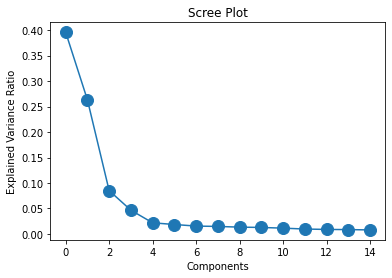

In [69]:
plt.plot(pca.explained_variance_ratio_, marker='o', markersize=12)
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()